In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd




In [3]:
# Importing data and add it to an array

#path_1 = "/content/drive/MyDrive/Colab Notebooks/MECH 798M/Mech 798M final Project /Machine Learning Data  - Longitudinal tension, Longitudinal compression, Transverse tension, Transverse compression, In-plane shear.xlsx"
path_1 = "/content/drive/MyDrive/Colab Notebooks/MECH 798M/Mech 798M final Project /Machine Learning Data .xlsx"


df1 = pd.read_excel(path_1 )

# Display the first few rows of the DataFrame
print('The data in the  data array is' ,df1.head(1))
data_array_1 = df1.values

print('The shape of the data array is ',data_array_1.shape)




The data in the  data array is                     Specimen ID Fibers    Resin  Test Cure Cycle Condition  \
0  AITR1392-ASU1-LC-A-MH1-CTD-1     AS4  MTM45-1   LC         MH       CTD   

   Orientation  # Plies in\nLaminate  Modulus Measured [Msi]  
0            0                    16                   16.66  
The shape of the data array is  (1128, 9)


In [4]:
# One-hot Encoding of the data Input Variables

import pandas as pd
import numpy as np


#  DataFrame
data = {
   'Fibre': data_array_1[:,1],
   'Resin': data_array_1[:,2],
   'Test': data_array_1[:,3],
   'Cure Cycle': data_array_1[:,4],
   'Condition': data_array_1[:,5],
   'Orientation': data_array_1[:,6],
  # '#Plies in Laminate': data_array_1[:,7],
   'Modulus': data_array_1[:,-1],

}
data['Modulus'] = pd.to_numeric(data['Modulus'], errors='coerce')  # turning data into numerical data


df = pd.DataFrame(data)

# Perform one-hot encoding
encoded_df = pd.get_dummies(df, columns=['Fibre', 'Resin', 'Test', 'Cure Cycle', 'Condition',
                                          'Orientation'])
# Convert encoded DataFrame to NumPy array
encoded_array = encoded_df.values

# Example boolean matrix
encoded_array = np.array(encoded_array)



# Display the encoded DataFrame
print('Enocoded df',encoded_df)

# Display the array
print('Enocoded array',encoded_array.shape)

# Display the shape of the encoded_array array
print('Enocoded array shape',encoded_array)





Enocoded df       Modulus  Fibre_AS4  Fibre_IM7  Resin_Hexel 8552  Resin_MTM45-1  Test_LC  \
0      16.660       True      False             False           True     True   
1      16.030       True      False             False           True     True   
2      16.790       True      False             False           True     True   
3      16.660       True      False             False           True     True   
4      17.800       True      False             False           True     True   
...       ...        ...        ...               ...            ...      ...   
1123    0.983      False       True             False           True    False   
1124    1.105      False       True             False           True    False   
1125    1.109      False       True             False           True    False   
1126    1.090      False       True             False           True    False   
1127    1.139      False       True             False           True    False   

      Test_LT  

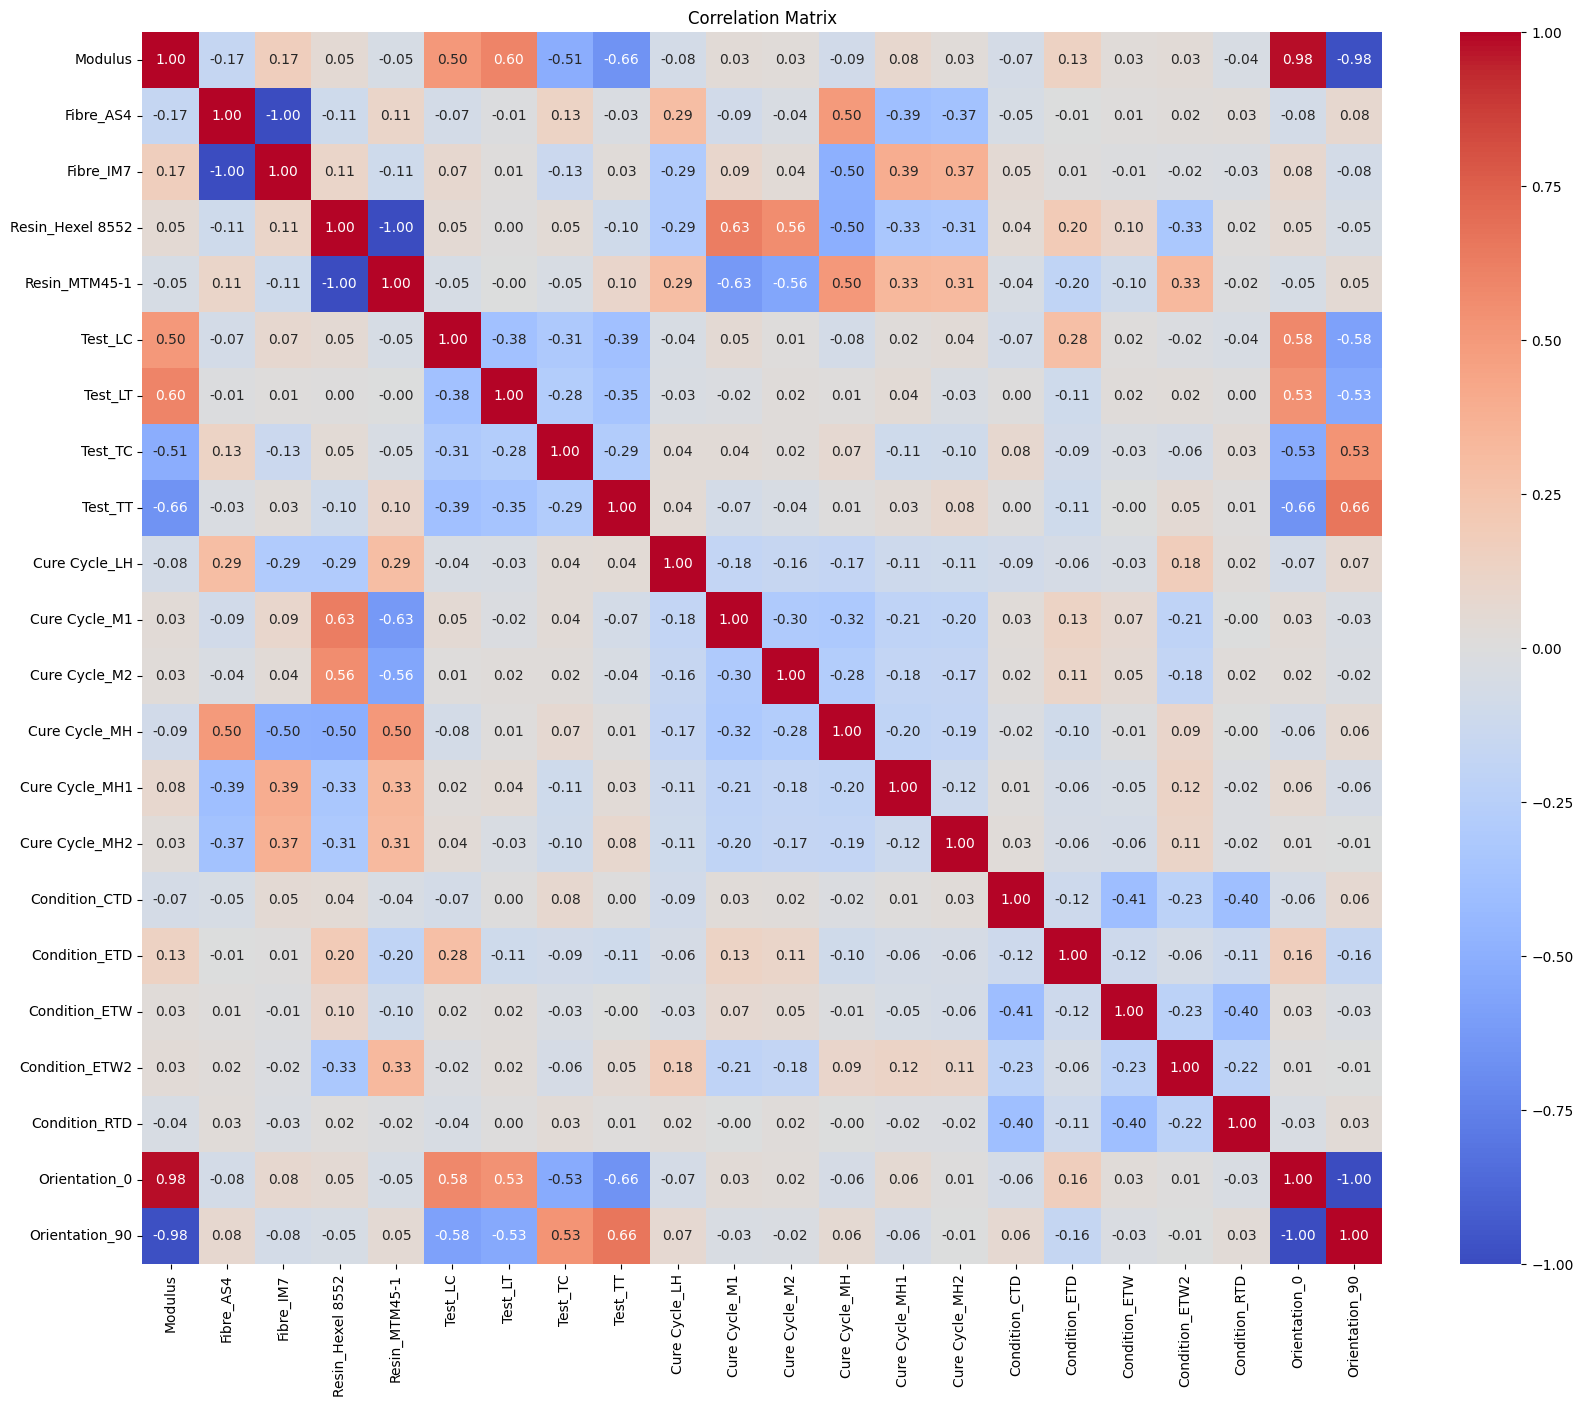

<Figure size 5000x2000 with 0 Axes>

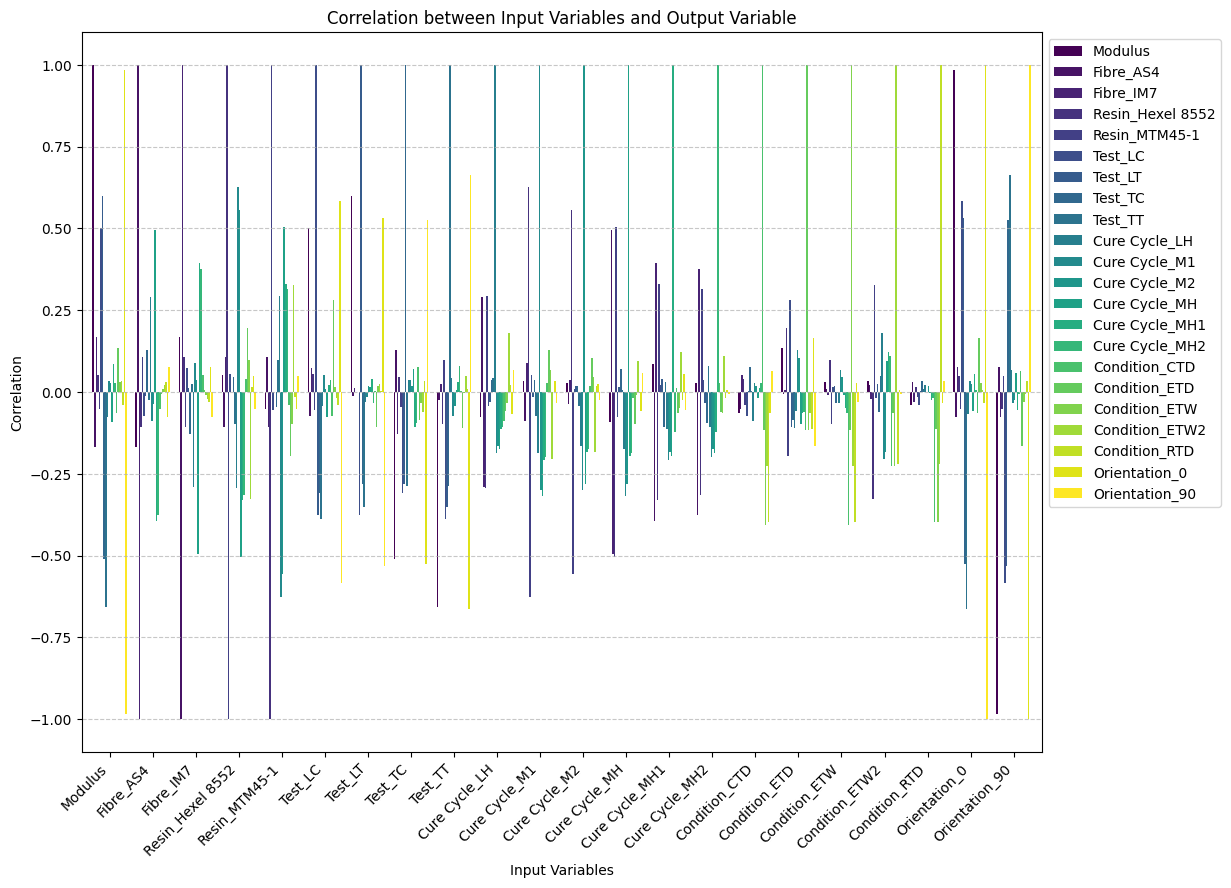

In [5]:
# Data Visualization using Heat map to sea the relation of features with each other.


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Concatenate the output column vector to the one-hot encoded data matrix

data_array_1_df = pd.DataFrame(data['Modulus'])

data_with_output = pd.concat([encoded_df, data_array_1_df], axis=1)

data_with_output = data_with_output.iloc[:,:-1]


# Calculate the correlation matrix
correlation_matrix = data_with_output.corr()


# Plot correlation matrix as a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Matrix')
plt.show()


# Define custom color palette
num_variables = len(correlation_matrix )
colors = plt.cm.viridis(np.linspace(0, 1, num_variables))  # Using Viridis color map

# Set the desired figure size
plt.figure(figsize=(50, 20))

# Plot correlations as a bar chart with custom colors
bars = correlation_matrix .plot(kind='bar', color=colors, width=0.8)  # Adjust width of bars as needed
plt.title('Correlation between Input Variables and Output Variable')
plt.xlabel('Input Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Increase size of the data area
ax = plt.gca()
ax.set_position([1, 1, 1.5, 1.5])  # Adjust the left, bottom, width, and height values as needed

# Move legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()




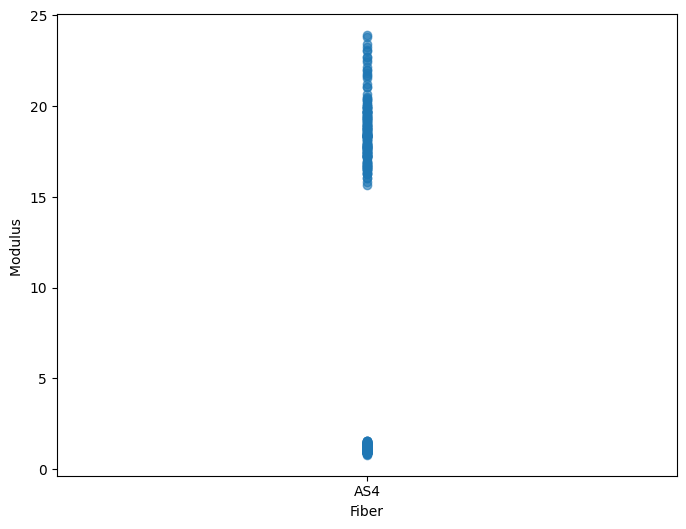

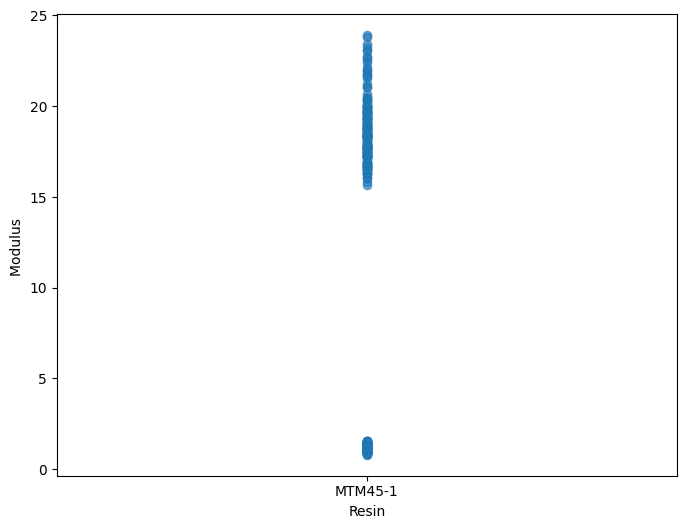

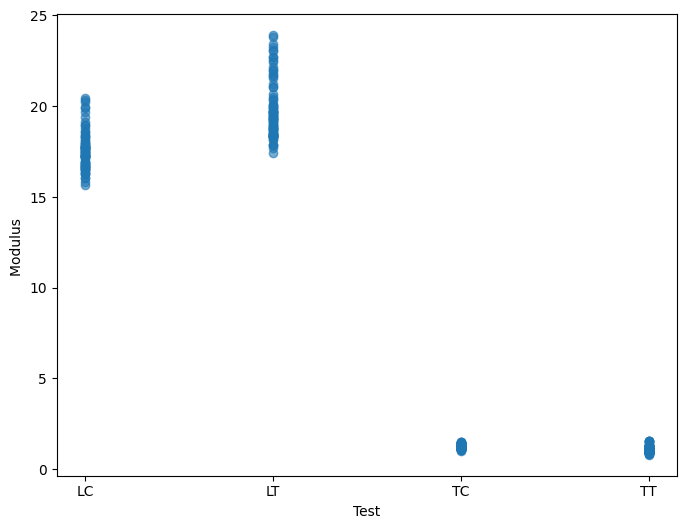

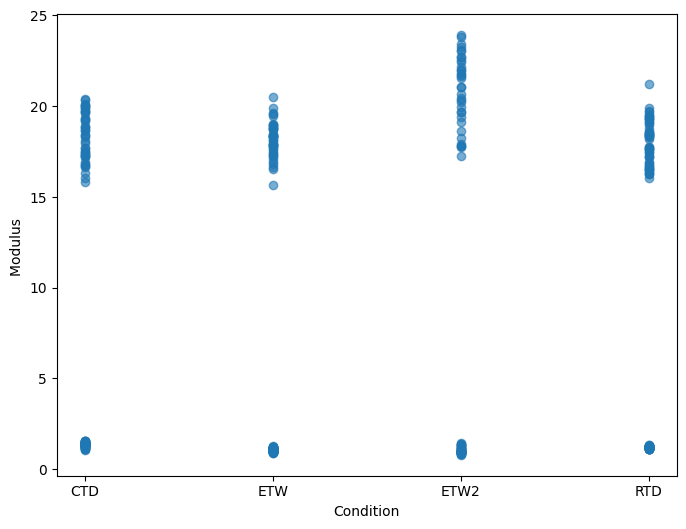

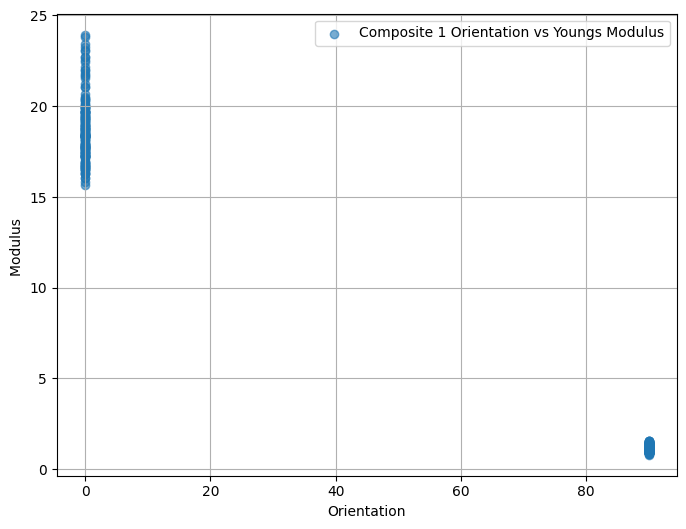

In [6]:

# Data visualization of one composite compossed of fiber  "AS4" and resin "MTM45-1"
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(8, 6))
plt.scatter(data_array_1  [0:363, 1], data_array_1  [0:363,-1], label='Composite 1 Fiber vs Youngs Modulus', alpha=0.6)
plt.xlabel('Fiber')
plt.ylabel('Modulus ')

plt.figure(figsize=(8, 6))
plt.scatter(data_array_1  [0:363, 2], data_array_1  [0:363,-1], label='Composite 1 Resin vs Youngs Modulus', alpha=0.6)
plt.xlabel('Resin')
plt.ylabel('Modulus ')


plt.figure(figsize=(8, 6))
plt.scatter(data_array_1  [0:363, 3], data_array_1  [0:363,-1], label='Composite 1 Test vs Youngs Modulus', alpha=0.6)
plt.xlabel('Test')
plt.ylabel('Modulus ')


plt.figure(figsize=(8, 6))
plt.scatter(data_array_1  [0:363, 5], data_array_1  [0:363,-1], label='Composite 1 Condition vs Youngs Modulus', alpha=0.6)
plt.xlabel('Condition')
plt.ylabel('Modulus ')

plt.figure(figsize=(8, 6))
plt.scatter(data_array_1  [0:363, 6], data_array_1  [0:363,-1], label='Composite 1 Orientation vs Youngs Modulus', alpha=0.6)

plt.xlabel('Orientation')
plt.ylabel('Modulus ')

plt.legend()
plt.grid(True)
plt.show()



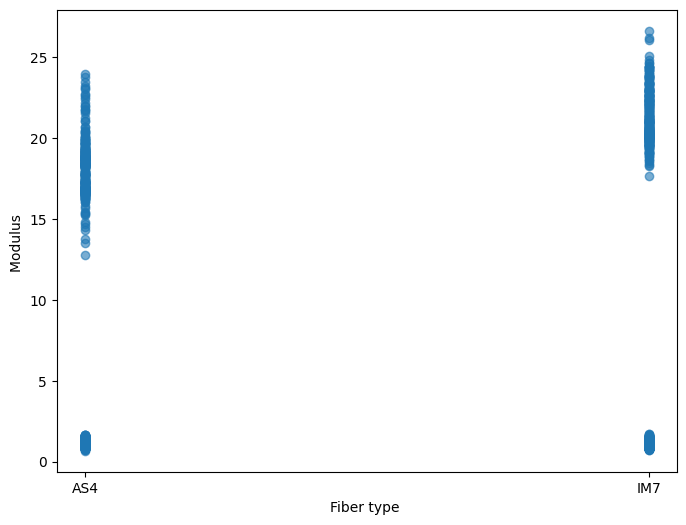

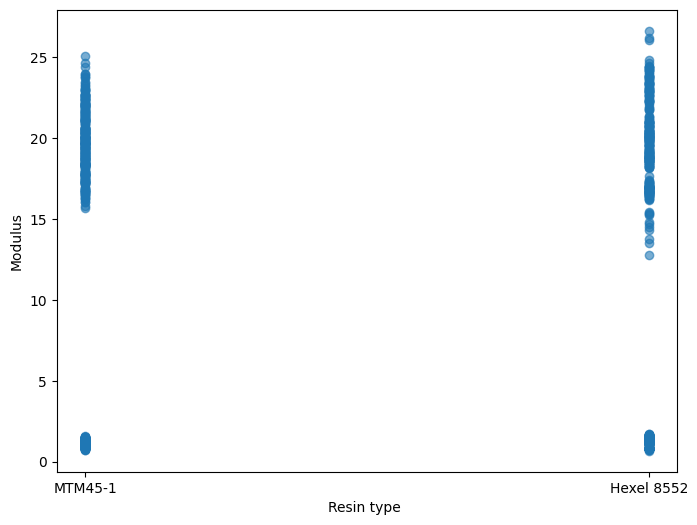

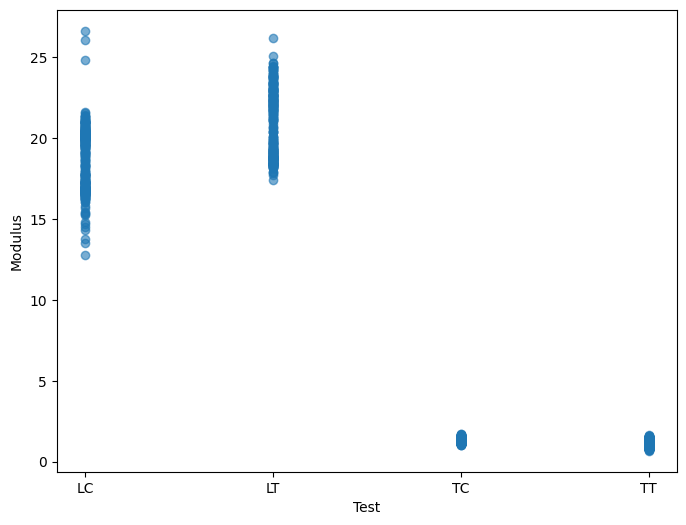

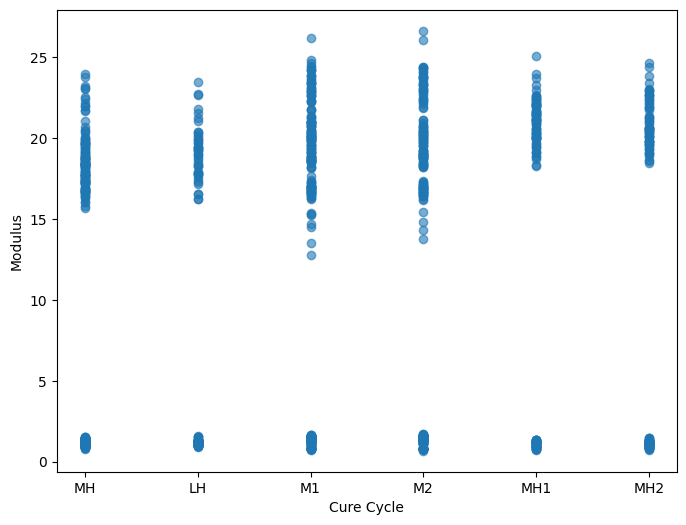

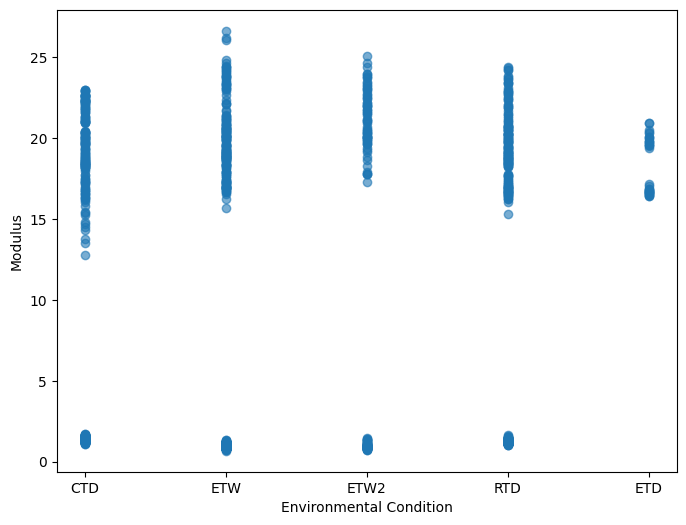

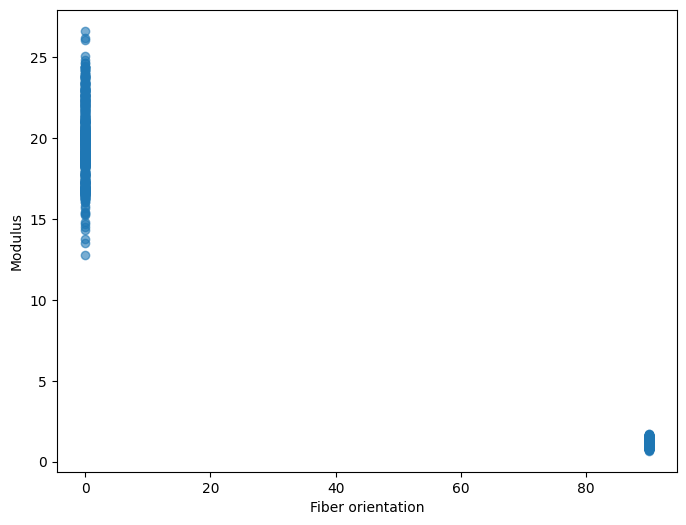

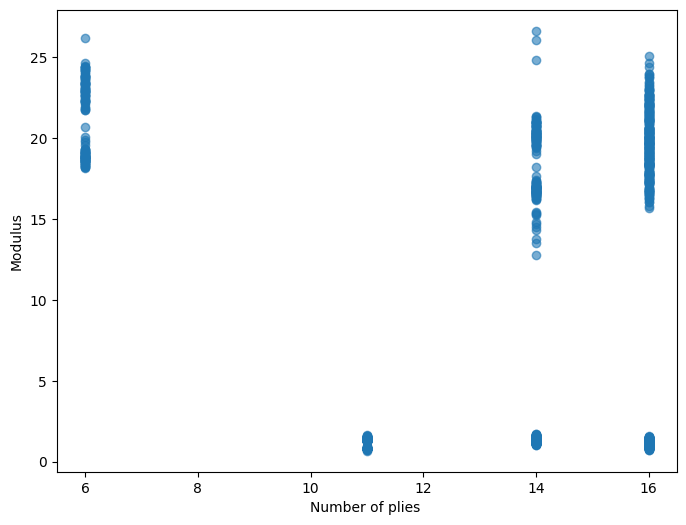

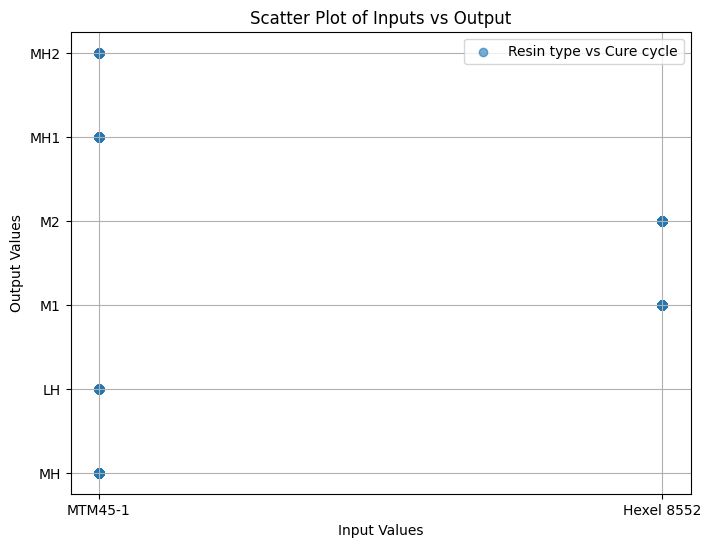

In [7]:
# Data visualization of all composites


import matplotlib.pyplot as plt


# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data_array_1  [:, 1], data_array_1  [:, -1], label='Input 3 vs Output', alpha=0.6)
plt.xlabel('Fiber type ')
plt.ylabel('Modulus ')

plt.figure(figsize=(8, 6))
plt.scatter(data_array_1  [:, 2], data_array_1  [:, -1], label='Input 3 vs Output', alpha=0.6)
plt.xlabel('Resin type ')
plt.ylabel('Modulus')

plt.figure(figsize=(8, 6))
plt.scatter(data_array_1 [:, 3], data_array_1[:, -1], label='Input 4 vs Output', alpha=0.6)
plt.xlabel('Test')
plt.ylabel('Modulus')

plt.figure(figsize=(8, 6))
plt.scatter(data_array_1  [:, 4], data_array_1[:, -1], label='Input 3 vs Output', alpha=0.6)
plt.xlabel('Cure Cycle')
plt.ylabel('Modulus')

plt.figure(figsize=(8, 6))
plt.scatter(data_array_1  [:, 5], data_array_1[:, -1], label='Input 3 vs Output', alpha=0.6)
plt.xlabel('Environmental Condition')
plt.ylabel('Modulus')

plt.figure(figsize=(8, 6))
plt.scatter(data_array_1  [:, 6], data_array_1[:, -1], label='Input 3 vs Output', alpha=0.6)
plt.xlabel('Fiber orientation')
plt.ylabel('Modulus')

plt.figure(figsize=(8, 6))
plt.scatter(data_array_1  [:, 7], data_array_1[:, -1], label='Input 3 vs Output', alpha=0.6)
plt.xlabel('Number of plies ')
plt.ylabel('Modulus')

plt.figure(figsize=(8, 6))
plt.scatter(data_array_1  [:, 2], data_array_1[:, 4], label='Resin type vs Cure cycle', alpha=0.6)
plt.xlabel('Resin ')
plt.ylabel('cure cycle')

# Labeling the plot
plt.title('Scatter Plot of Inputs vs Output')
plt.xlabel('Input Values')
plt.ylabel('Output Values')
plt.legend()
plt.grid(True)
plt.show()


Visualization of encoded data and collecting it for external analysis

In [8]:
import pandas as pd

# Convert the array to a DataFrame
df = pd.DataFrame(encoded_df)

# Define the file path for the Excel file
file_path = '/content/drive/MyDrive/Colab Notebooks/MECH 798M/Mech 798M final Project /Viewing.xlsx'  # Change the file path as needed

# Export the DataFrame to an Excel file
df.to_excel(file_path, index=False)

print("Array data exported to Excel file:", file_path)


Array data exported to Excel file: /content/drive/MyDrive/Colab Notebooks/MECH 798M/Mech 798M final Project /Viewing.xlsx


In [9]:
# Shuffling Data then splitting

import numpy as np


# Shuffle the data matrix along the rows

np.random.shuffle(encoded_array)

# Define proportions for train, validation, and test sets
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Calculate sizes for train, validation, and test sets
num_samples = encoded_array.shape[0]
train_size = int(train_ratio * num_samples)
val_size = int(val_ratio * num_samples)

# Split the shuffled data matrix into train, validation, and test sets
train_data = encoded_array[:train_size, :]
val_data = encoded_array[train_size:train_size + val_size, :]
test_data = encoded_array[train_size + val_size:, :]

# Display the sizes of train, validation, and test sets
print("Train Data Size:", train_data.shape)
print("Validation Data Size:", val_data.shape)
print("Test Data Size:", test_data.shape)

print("Train Data Size:", train_data)
print("Validation Data Size:", val_data)
print("Test Data Size:", test_data)

Train Data Size: (676, 22)
Validation Data Size: (225, 22)
Test Data Size: (227, 22)
Train Data Size: [[18.72 True False ... False True False]
 [20.694 True False ... True True False]
 [1.157 True False ... False False True]
 ...
 [1.109 False True ... True False True]
 [20.158 False True ... False True False]
 [18.38 True False ... True True False]]
Validation Data Size: [[16.532 True False ... False True False]
 [1.41 True False ... False False True]
 [1.13 True False ... True False True]
 ...
 [21.651 False True ... False True False]
 [19.049 False True ... False True False]
 [23.11 True False ... False True False]]
Test Data Size: [[18.38 True False ... True True False]
 [21.348 False True ... False True False]
 [19.73 False True ... True True False]
 ...
 [20.656 False True ... False True False]
 [18.79 True False ... False True False]
 [1.56 True False ... False False True]]


Flattenning the encoded array data for later use

In [10]:
# Shuffling Data for one composite

import numpy as np


# Shuffle the data matrix along the rows
np.random.shuffle(encoded_array)

# Define proportions for train, validation, and test sets
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

# Calculate sizes for train, validation, and test sets
num_samples = encoded_array.shape[0]
train_size = int(train_ratio * num_samples)
val_size = int(val_ratio * num_samples)

# Split the shuffled data matrix into train, validation, and test sets
train_data = encoded_array[:train_size, :]
val_data = encoded_array[train_size:train_size + val_size, :]
test_data = encoded_array[train_size + val_size:, :]

# Display the sizes of train, validation, and test sets
print("Train Data Size:", train_data.shape)
print("Validation Data Size:", val_data.shape)
print("Test Data Size:", test_data.shape)

print("Train Data Size:", train_data)
print("Validation Data Size:", val_data)
print("Test Data Size:", test_data)

Train Data Size: (676, 22)
Validation Data Size: (225, 22)
Test Data Size: (227, 22)
Train Data Size: [[0.98 True False ... False False True]
 [20.49 True False ... False True False]
 [16.778 True False ... False True False]
 ...
 [1.464 True False ... True False True]
 [23.011 False True ... False True False]
 [19.341 True False ... False True False]]
Validation Data Size: [[1.35 True False ... True False True]
 [19.268 True False ... False True False]
 [1.26 True False ... True False True]
 ...
 [1.406 True False ... True False True]
 [16.925 True False ... False True False]
 [0.96 True False ... False False True]]
Test Data Size: [[18.34 True False ... False True False]
 [24.203 False True ... False True False]
 [19.28 True False ... False True False]
 ...
 [1.065 True False ... False False True]
 [18.568 True False ... False True False]
 [20.043 False True ... False True False]]


Linear Regression : Linear Regression : Linear Regression : Linear Regression : Linear Regression : Linear Regression : Linear Regression

In [11]:
# Linear  Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Input data
X_train = train_data[:,1:]
X_validation = val_data[:,1:]
X_test = test_data[:,1:]

y_train = train_data[:,0]
y_validation = val_data[:,0]
y_test = test_data[:,0]


model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred_train_LR = model.predict(X_train)
y_pred_test_LR = model.predict(X_test)


# Calculate Mean Squared Error
mse_train  = mean_squared_error(y_train, y_pred_train_LR)
mse_test = mean_squared_error(y_test, y_pred_test_LR)

print("Mean Squared Error for train :", mse_train ,"Mean Squared Errorfor test:", mse_test)






Mean Squared Error for train : 1.1589005528846152 Mean Squared Errorfor test: 1.2555007483480176


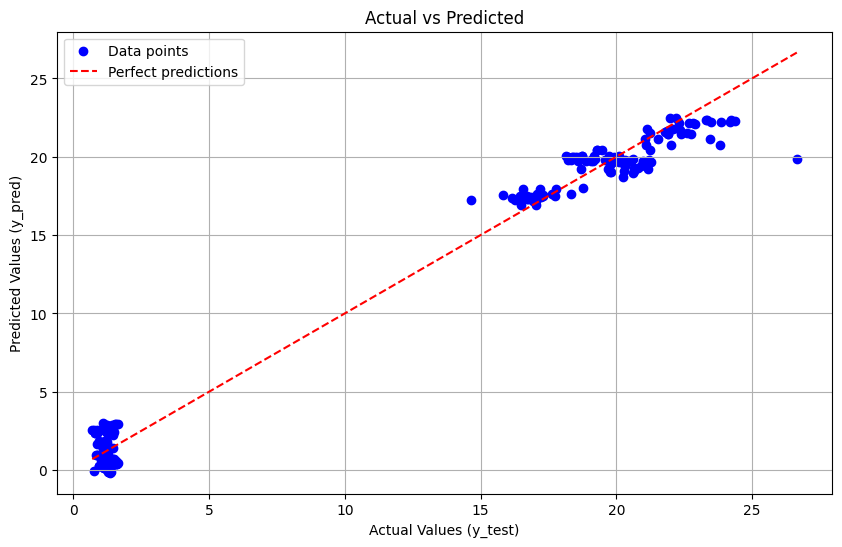

In [12]:
# Visualization of Linear regression results

import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test and y_pred are already defined
# y_test = true values, y_pred = predicted values

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test,  y_pred_test_LR, color='blue', label='Data points')

# Line indicating perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect predictions')

plt.title('Actual vs Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()

Ridge Regression : Ridge Regression : Ridge Regression : Ridge Regression : Ridge Regression : Ridge Regression

Hyperparameter tuning of  Ridge regression model

In [13]:

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Input data
# Input data
X_train = train_data[:,1:]
X_validation = val_data[:,1:]
X_test = test_data[:,1:]

y_train = train_data[:,0]
y_validation = val_data[:,0]
y_test = test_data[:,0]


# Define alpha values to try
alphas = np.linspace(0,10, 1000 )  # Try 101 alpha values from 0 to 100

# Initialize lists to store MSE values for training and test sets
train_mse_values = []
Validation_mse_values = []



# Loop over each alpha value
for alpha in alphas:
    # Create Ridge Regression model with current alpha value
    ridge_model = Ridge(alpha=alpha)

    # Fit the model to the training data
    ridge_model.fit(X_train, y_train)

    # Predict on training and test sets
    y_train_pred = ridge_model.predict(X_train)
    y_test_pred = ridge_model.predict(X_validation)

    # Calculate MSE for training and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_validation, y_test_pred)

    # Append MSE values to lists
    train_mse_values.append(train_mse)
    Validation_mse_values.append(test_mse)

    print(f"Alpha: {alpha}, Train MSE: {train_mse}, Validation MSE: {test_mse}")

# Find the alpha that minimizes the test MSE
best_alpha = alphas[np.argmin(Validation_mse_values)]
print(f"Best alpha: {best_alpha}")


Alpha: 0.0, Train MSE: 4.108104741124261, Validation MSE: 3.8603781333333336
Alpha: 0.01001001001001001, Train MSE: 1.1516961853193335, Validation MSE: 1.360431224438892
Alpha: 0.02002002002002002, Train MSE: 1.1516963460354008, Validation MSE: 1.3604534441085518
Alpha: 0.03003003003003003, Train MSE: 1.151696613806001, Validation MSE: 1.3604757703960584
Alpha: 0.04004004004004004, Train MSE: 1.151696988558035, Validation MSE: 1.3604982032305042
Alpha: 0.050050050050050046, Train MSE: 1.1516974702185248, Validation MSE: 1.3605207425410946
Alpha: 0.06006006006006006, Train MSE: 1.1516980587146146, Validation MSE: 1.3605433882571492
Alpha: 0.07007007007007007, Train MSE: 1.1516987539735695, Validation MSE: 1.360566140308106
Alpha: 0.08008008008008008, Train MSE: 1.151699555922775, Validation MSE: 1.360588998623514
Alpha: 0.09009009009009009, Train MSE: 1.1517004644897373, Validation MSE: 1.360611963133038
Alpha: 0.10010010010010009, Train MSE: 1.151701479602083, Validation MSE: 1.3606350

Solver: auto, Train MSE: 1.1516961853193335, Test MSE: 1.2553198874406346
Solver: svd, Train MSE: 1.1516961853193328, Test MSE: 1.2553198874406355
Solver: cholesky, Train MSE: 1.1516961853193335, Test MSE: 1.2553198874406346
Solver: lsqr, Train MSE: 1.1516962269769915, Test MSE: 1.2552724361492764
Solver: sparse_cg, Train MSE: 1.1516969362567204, Test MSE: 1.2550544819263818
Solver: sag, Train MSE: 1.151696519571477, Test MSE: 1.2552966609912268
Solver: saga, Train MSE: 1.1516962556091408, Test MSE: 1.2553834768427583
Best solver: sparse_cg


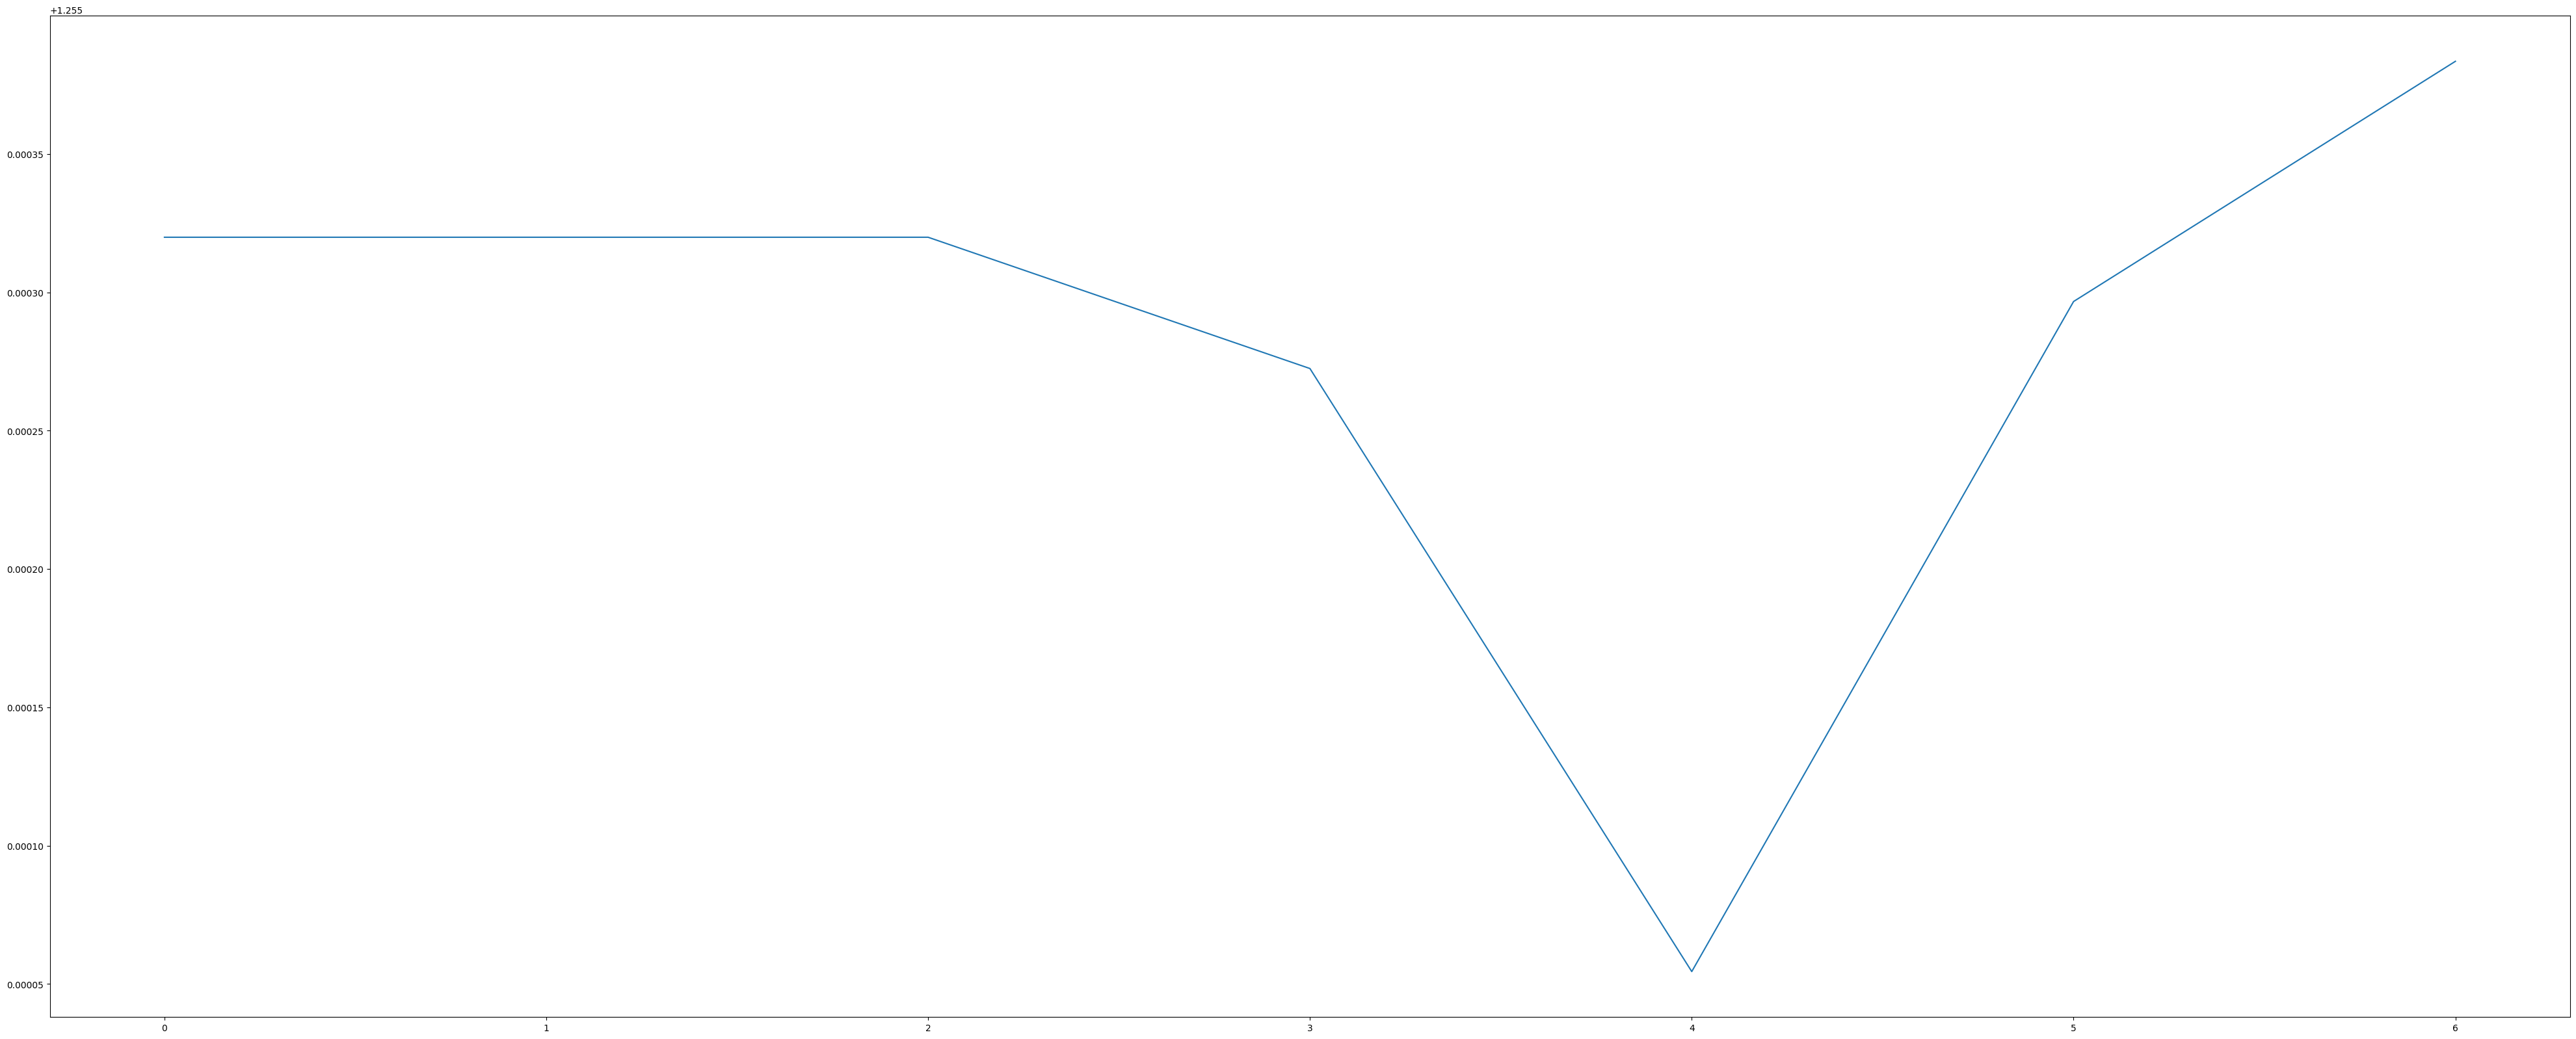

In [14]:

# Define Ridge Regression solvers to try
solvers = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']

# Initialize lists to store MSE values for training and test sets
train_mse_values = []
Validation_mse_values = []

# Loop over each solver
for solver in solvers:
    # Create Ridge Regression model with current solver
    ridge_model = Ridge(alpha=best_alpha, solver=solver)

    # Fit the model to the training data
    ridge_model.fit(X_train, y_train)

    # Predict on training and test sets
    y_train_pred = ridge_model.predict(X_train)
    y_test_pred = ridge_model.predict(X_test)

    # Calculate MSE for training and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Append MSE values to lists
    train_mse_values.append(train_mse)
    Validation_mse_values.append(test_mse)

    print(f"Solver: {solver}, Train MSE: {train_mse}, Test MSE: {test_mse}")

# Find the solver that minimizes the test MSE
best_solver = solvers[np.argmin(Validation_mse_values)]
plt.figure(figsize=(50, 20))
plt.plot(Validation_mse_values)

print(f"Best solver: {best_solver}")


In [15]:
# Ridge Regression Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np


# Train Ridge regression model
alpha =  best_alpha # Regularization strength (hyperparameter)
ridge_model = Ridge(alpha=alpha, solver='auto', max_iter=None, tol=0.001)
ridge_model.fit(X_train, y_train)





# Predict on the test set
y_pred_train_RR = ridge_model.predict(X_train)
y_pred_test_RR = ridge_model.predict(X_test)

# Calculate Mean Squared Error
mse_train  = mean_squared_error(y_train, y_pred_train_RR  )
mse_test = mean_squared_error(y_test, y_pred_test_RR)

print("Mean Squared Error for train :", mse_train ,"Mean Squared Errorfor test:", mse_test)

# Print model coefficients (optional)
print("Model Coefficients:", ridge_model.coef_)


Mean Squared Error for train : 1.1516961853193335 Mean Squared Errorfor test: 1.2553198874406346
Model Coefficients: [-1.1959018   1.1959018   0.02585254 -0.02585254  1.94132573  4.20291051
 -2.86517577 -3.27906047  0.64500255 -0.02123252  0.04708506  0.36795218
 -0.42541634 -0.61339093 -0.13500723 -0.4210197  -0.02401552  0.69275545
 -0.11271301  6.14423624 -6.14423624]


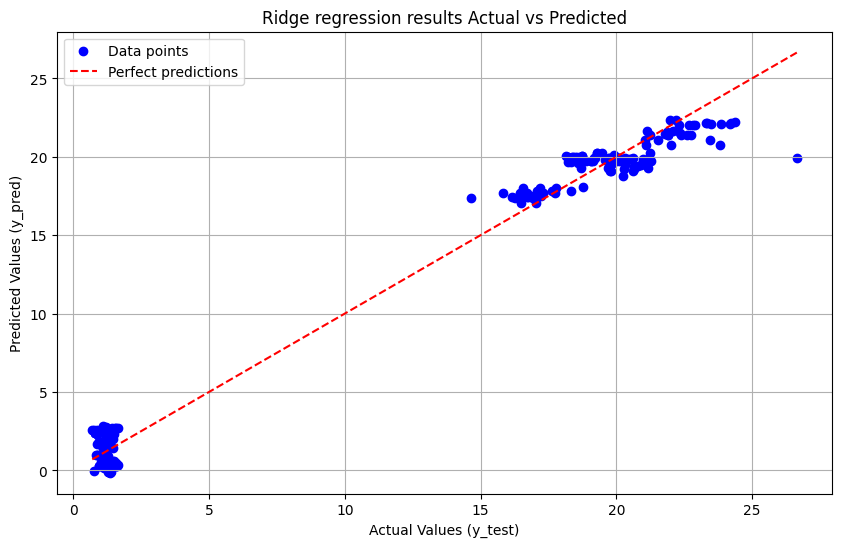

In [16]:
# Visualization of  Ridge regression results

import matplotlib.pyplot as plt
import numpy as np


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test,   y_pred_test_RR, color='blue', label='Data points')

# Line indicating perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect predictions')

plt.title('Ridge regression results Actual vs Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()

Random ForestRegressor : Random ForestRegressor : Random ForestRegressor  : Random ForestRegressor : Random ForestRegressor

N_estimators: 1, Train MSE: 0.2831696922519529, Validation MSE: 0.5345282002873246
N_estimators: 2, Train MSE: 0.2701698392527942, Validation MSE: 0.51161049722645
N_estimators: 3, Train MSE: 0.2613385411349773, Validation MSE: 0.49657431749869363
N_estimators: 4, Train MSE: 0.2579624154780735, Validation MSE: 0.4903931586901917
N_estimators: 5, Train MSE: 0.25761382530208987, Validation MSE: 0.49061244839586493
N_estimators: 6, Train MSE: 0.25440718305069077, Validation MSE: 0.47804762437713344
N_estimators: 7, Train MSE: 0.2540760545592624, Validation MSE: 0.469078810513647
N_estimators: 8, Train MSE: 0.25383887694684343, Validation MSE: 0.46798098721833603
N_estimators: 9, Train MSE: 0.25362861940849735, Validation MSE: 0.4674241178839518
N_estimators: 10, Train MSE: 0.2529273746676102, Validation MSE: 0.46050495870724945
N_estimators: 11, Train MSE: 0.25249418456124734, Validation MSE: 0.4582098346417509
N_estimators: 12, Train MSE: 0.25267935720197277, Validation MSE: 0.4516113531

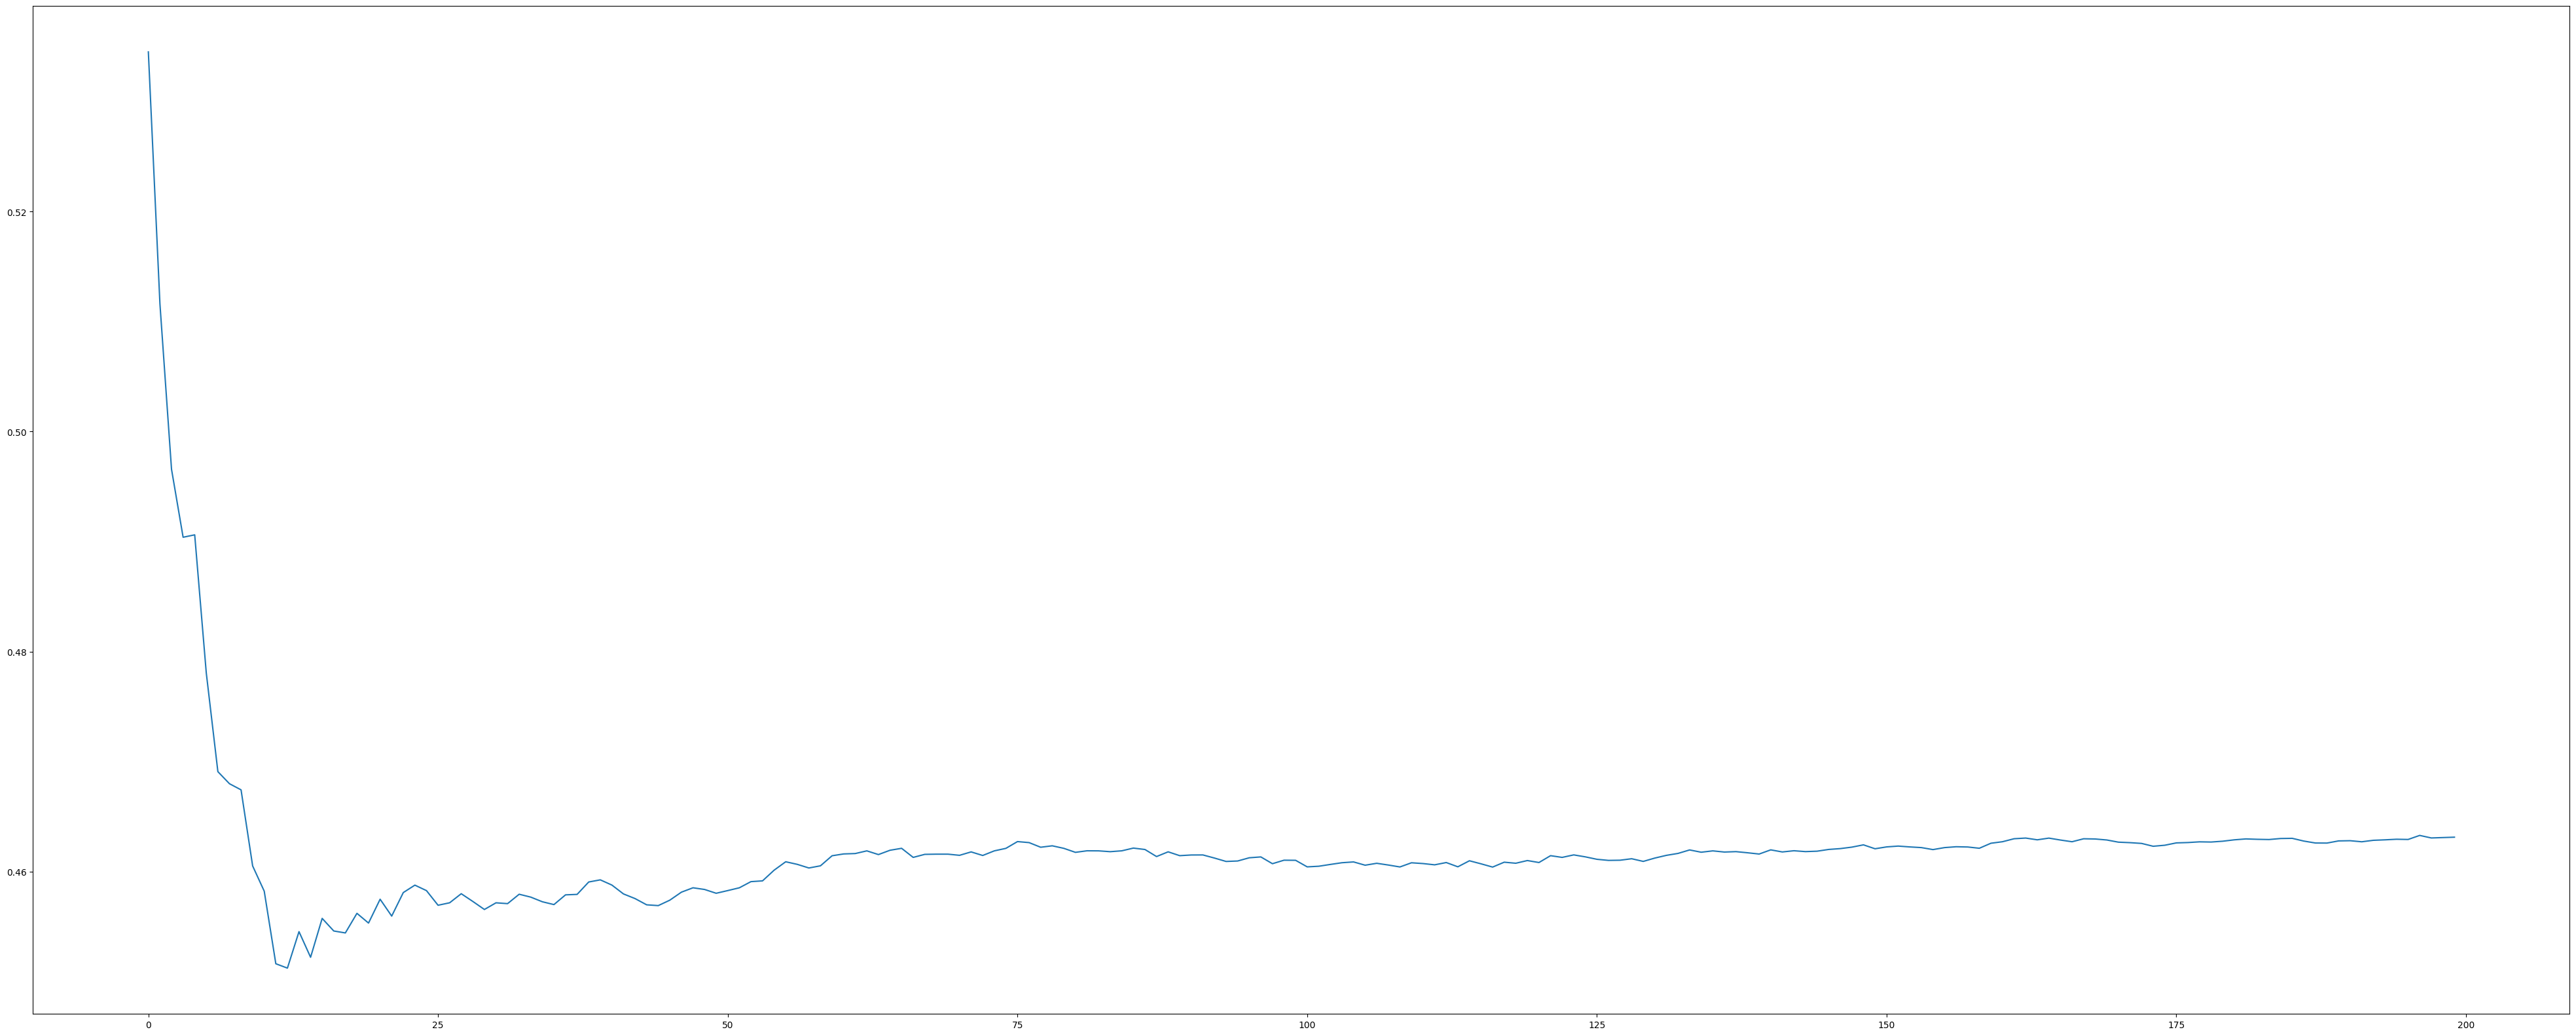

In [17]:
# Random ForestRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np



# Initialize lists to store MSE values for training and test sets
train_mse_values = []
Validation_mse_values = []

estimators = np.arange(1, 201)


# Loop over each n_estimators value
for n_estimators in estimators:

    # Initialize Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=10, random_state=42)

    # Train the model
    rf_regressor.fit(X_train, y_train)

    # Predict on training and test sets

    y_train_pred_RFR = rf_regressor.predict(X_train)
    y_test_pred_RFR = rf_regressor.predict(X_validation)

    # Calculate MSE for training and test sets
    train_mse = mean_squared_error(y_train, y_train_pred_RFR)
    test_mse = mean_squared_error(y_validation, y_test_pred_RFR)

    # Append MSE values to lists
    train_mse_values.append(train_mse)
    Validation_mse_values.append(test_mse)


    print(f"N_estimators: {n_estimators}, Train MSE: {train_mse}, Validation MSE: {test_mse}")

# Find the alpha that minimizes the test MSE
best_estimators = estimators[np.argmin(Validation_mse_values)]

plt.figure(figsize=(50, 20))
plt.plot(Validation_mse_values)

print(f"Best estimators: {best_estimators}")

Max_depth: 1, Train MSE: 2.8617942369407583, Validation MSE: 3.1396290212985445
Max_depth: 2, Train MSE: 1.477641782261031, Validation MSE: 1.675773994283619
Max_depth: 3, Train MSE: 0.6561159176024574, Validation MSE: 0.8452943838670696
Max_depth: 4, Train MSE: 0.38471549701069935, Validation MSE: 0.5760956758500291
Max_depth: 5, Train MSE: 0.2931229945238712, Validation MSE: 0.4720750631522343
Max_depth: 6, Train MSE: 0.26316024007880745, Validation MSE: 0.4323960727890481
Max_depth: 7, Train MSE: 0.2545756715811505, Validation MSE: 0.44410928765353586
Max_depth: 8, Train MSE: 0.2535337412131609, Validation MSE: 0.44600333608461945
Max_depth: 9, Train MSE: 0.25292052966864703, Validation MSE: 0.4506586419182919
Max_depth: 10, Train MSE: 0.25281538645774126, Validation MSE: 0.4512132520367499
Max_depth: 11, Train MSE: 0.25281538645774126, Validation MSE: 0.45121325203675006
Max_depth: 12, Train MSE: 0.25281538645774126, Validation MSE: 0.45121325203675006
Max_depth: 13, Train MSE: 0.2

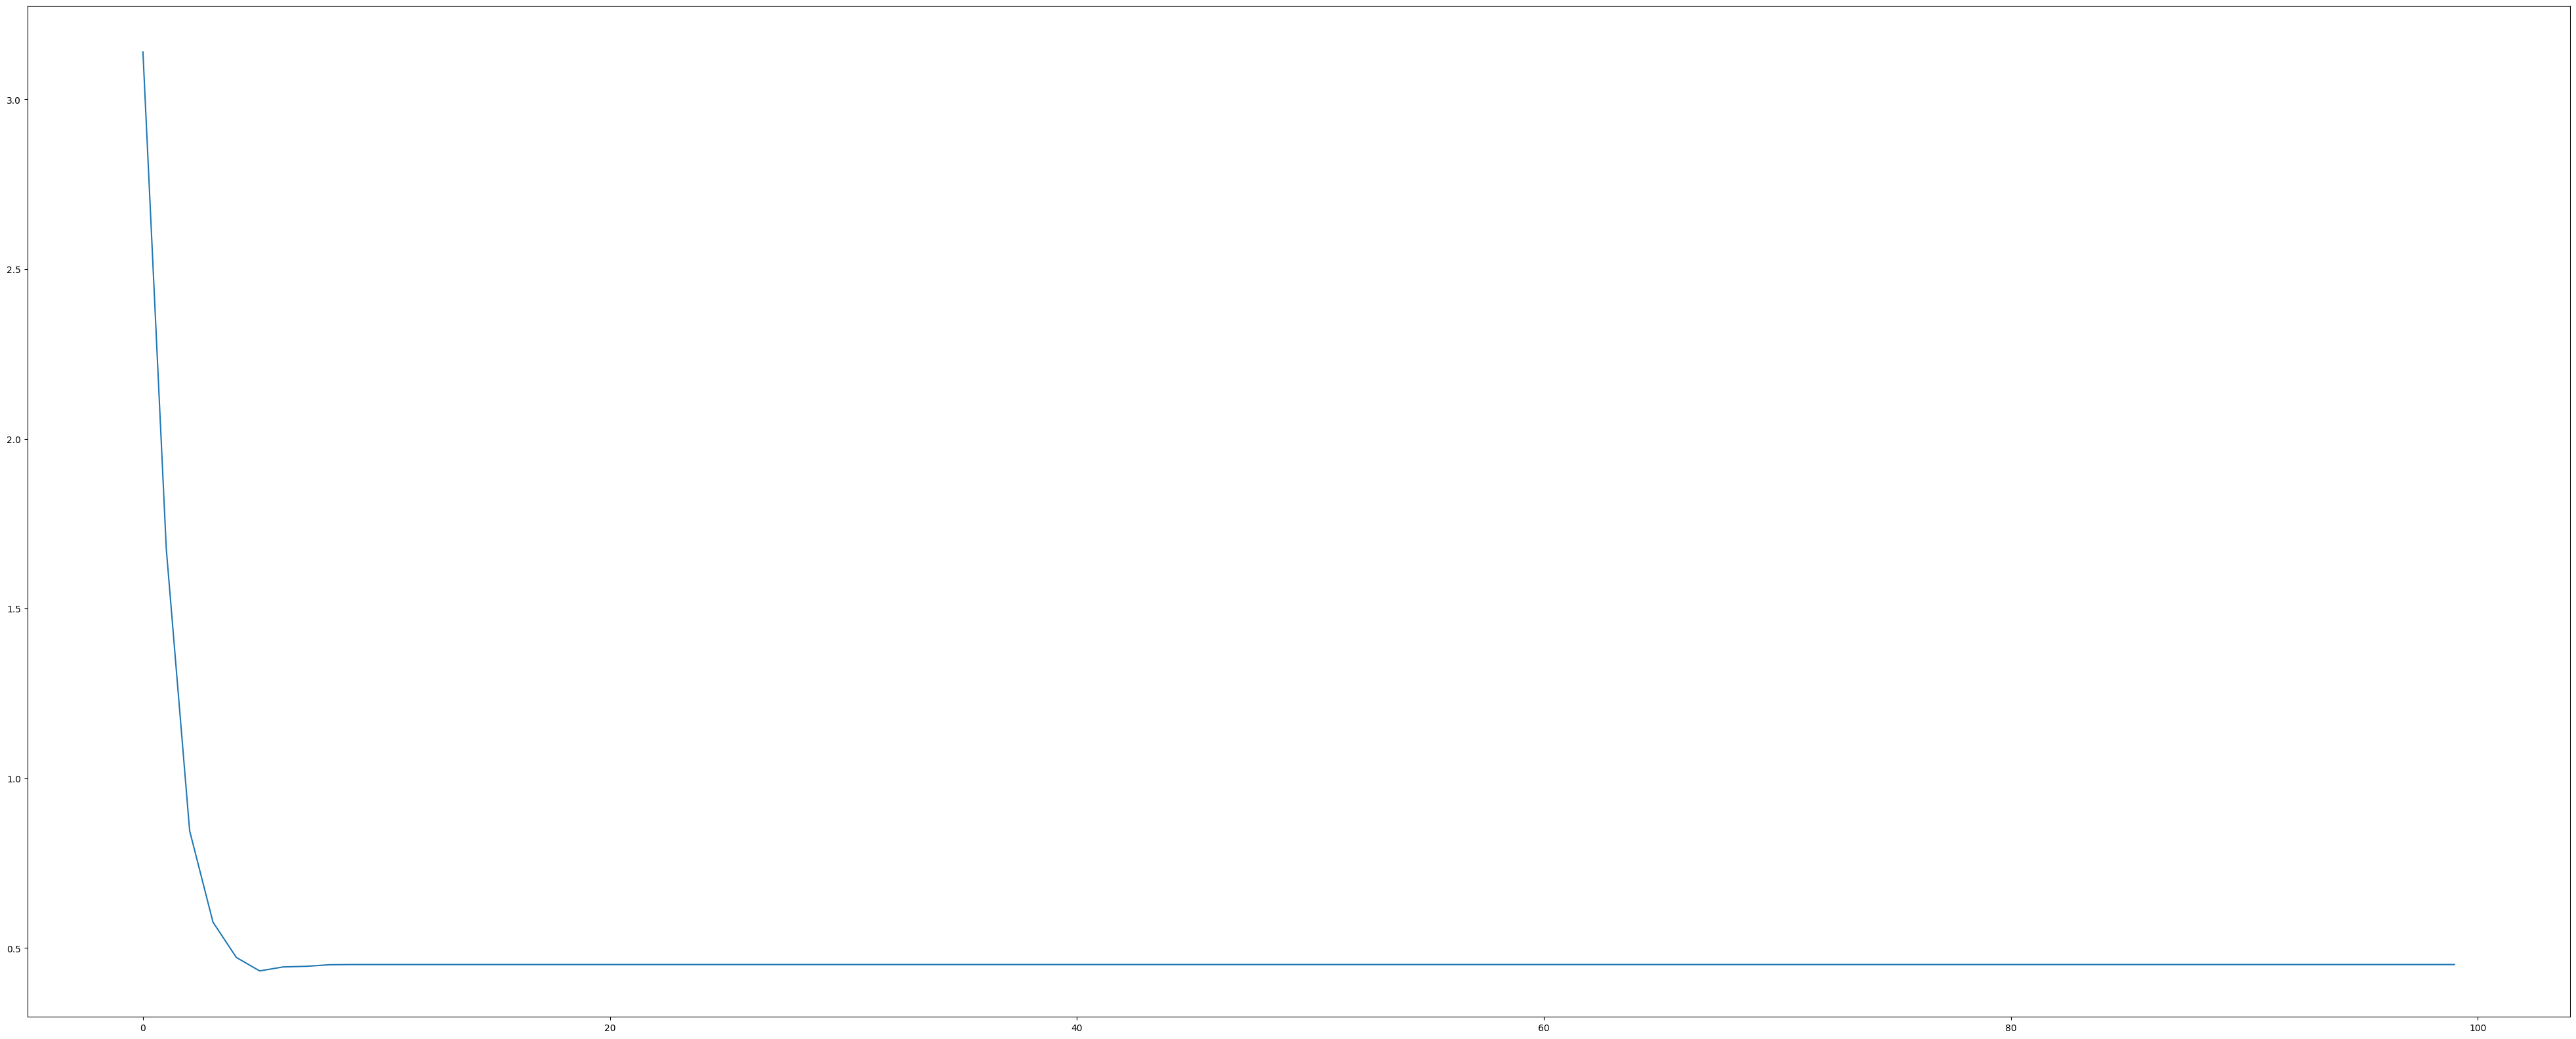

In [18]:
# Loop over each max_depth value

train_mse_values = []
Validation_mse_values = []
depth = np.arange(1, 101)


for max_depth in depth:

    # Initialize Random Forest Regressor
    rf_regressor = RandomForestRegressor(n_estimators=best_estimators, max_depth=max_depth, random_state=42)

    # Train the model
    rf_regressor.fit(X_train, y_train)

    # Predict on training and test sets

    y_train_pred_RFR = rf_regressor.predict(X_train)
    y_test_pred_RFR = rf_regressor.predict(X_validation)

    # Calculate MSE for training and test sets
    train_mse = mean_squared_error(y_train, y_train_pred_RFR)
    test_mse = mean_squared_error(y_validation, y_test_pred_RFR)

    # Append MSE values to lists
    train_mse_values.append(train_mse)
    Validation_mse_values.append(test_mse)


    print(f"Max_depth: { max_depth}, Train MSE: {train_mse}, Validation MSE: {test_mse}")

# Find the alpha that minimizes the test MSE
best_depth = estimators[np.argmin(Validation_mse_values)]
plt.figure(figsize=(50, 20))
plt.plot(Validation_mse_values)
print(f"Best depth: {best_depth}")

In [19]:
# Random ForestRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Input data

# Input data
X_train = train_data[:,1:]
X_validation = val_data[:,1:]
X_test = test_data[:,1:]

y_train = train_data[:,0]
y_validation = val_data[:,0]
y_test = test_data[:,0]

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=best_estimators, max_depth=best_depth, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)



# Predict on the test set
y_pred_train_RFR = rf_regressor.predict(X_train)
y_pred_test_RFR = rf_regressor.predict(X_test)

# Calculate Mean Squared Error
mse_train  = mean_squared_error(y_train, y_pred_train_RFR )
mse_test = mean_squared_error(y_test, y_pred_test_RFR)

print("Mean Squared Error for train :", mse_train ,"Mean Squared Errorfor test:", mse_test)

Mean Squared Error for train : 0.26316024007880745 Mean Squared Errorfor test: 0.41961272903155306


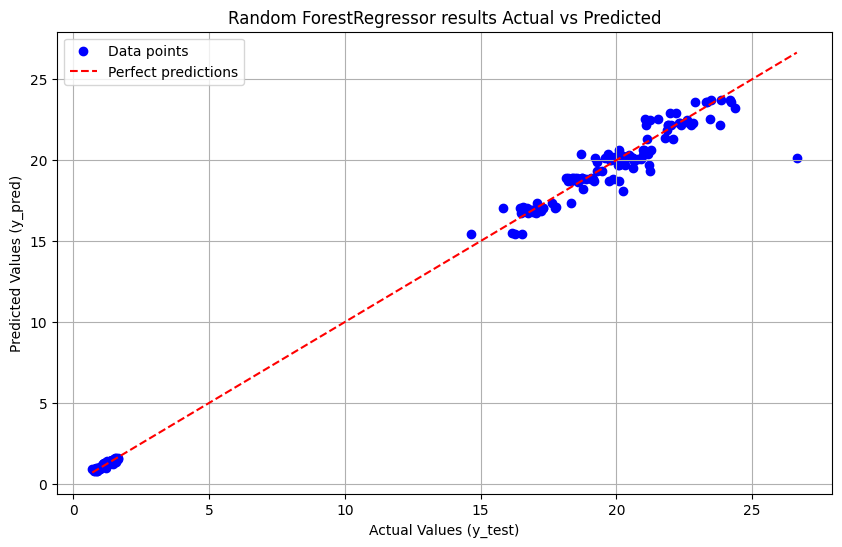

In [20]:
# Visualization of Random ForestRegressor results

import matplotlib.pyplot as plt
import numpy as np


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test,   y_pred_test_RFR, color='blue', label='Data points')

# Line indicating perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect predictions')

plt.title('Random ForestRegressor results Actual vs Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()

MLPRegressor MLPRegressor MLPRegressor MLPRegressor MLPRegressor MLPRegressor MLPRegressor MLPRegressor


Activation_functions: identity, Train MSE: 1.152570589922208, Validation MSE: 1.3581654808336023
Activation_functions: logistic, Train MSE: 0.32290461999724523, Validation MSE: 0.5007071938694045
Activation_functions: tanh, Train MSE: 0.3085774669733557, Validation MSE: 0.4960495782034688
Activation_functions: relu, Train MSE: 0.2690308707253237, Validation MSE: 0.4535837374700183
Best Activation functions: relu


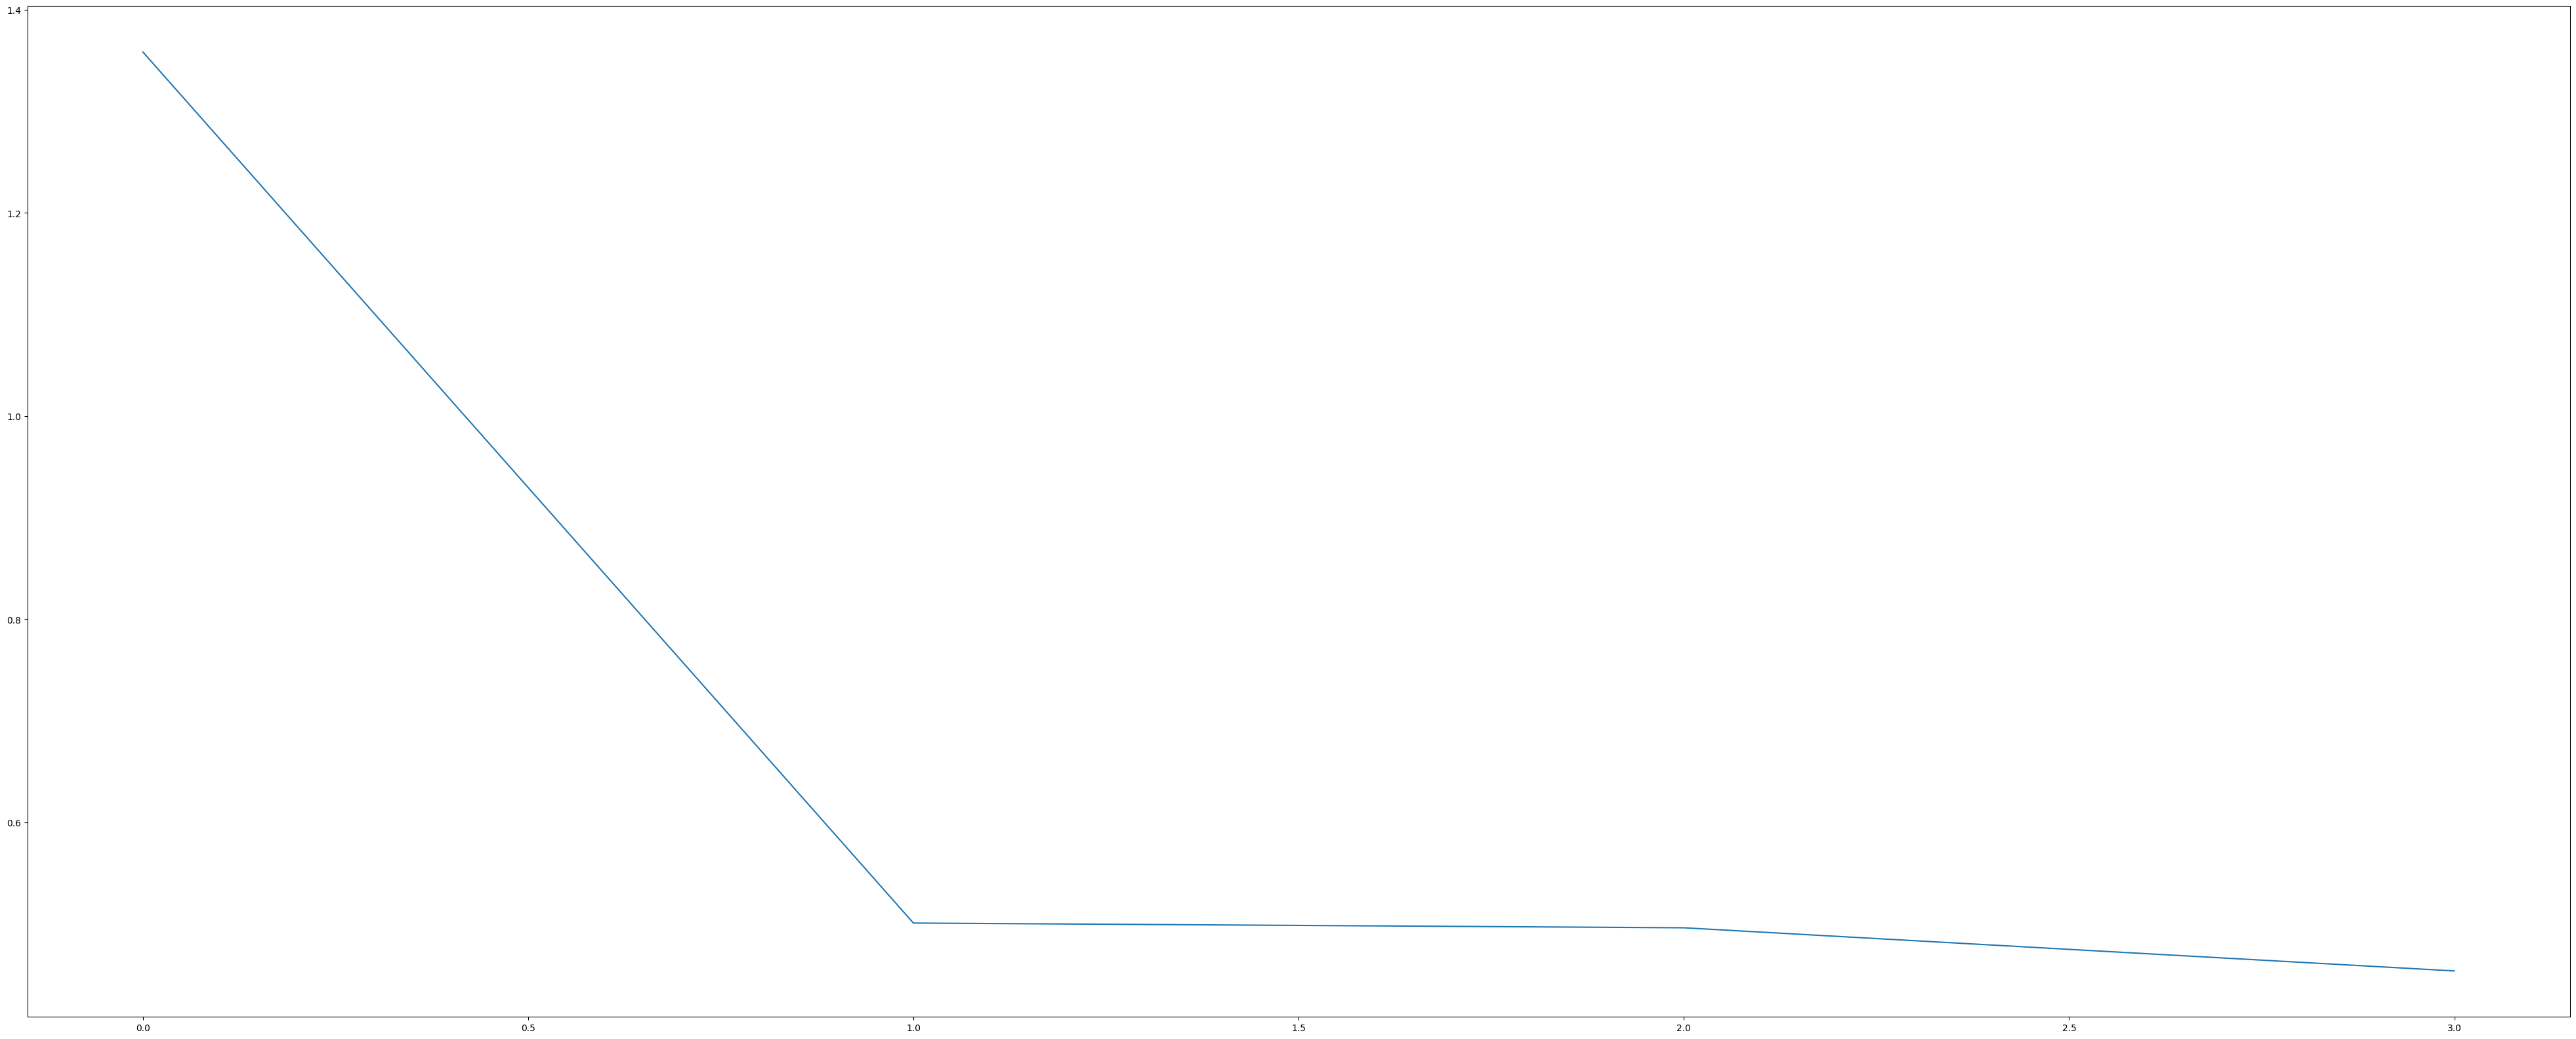

In [21]:

# MLPRegressor


from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Input data

# Input data
X_train = train_data[:,1:]
X_validation = val_data[:,1:]
X_test = test_data[:,1:]

y_train = train_data[:,0]
y_validation = val_data[:,0]
y_test = test_data[:,0]

# Initialize MLP regressor

activation_functions = ['identity', 'logistic', 'tanh', 'relu']

# Initialize lists to store MSE values for training and test sets
train_mse_values = []
Validation_mse_values = []

# Loop over each solver
for activation in activation_functions:
    # Create MLPRegressor model with current activation
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50, 50), activation=activation, solver='adam',
                         alpha=0.0001, batch_size='auto', learning_rate='adaptive',
                         max_iter=1000, random_state=42)

    # Train the regressor
    mlp_regressor.fit(X_train, y_train)


    # Predict on training and validation sets

    y_train_pred = mlp_regressor.predict(X_train)
    y_test_pred = mlp_regressor.predict(X_validation)

    # Calculate MSE for training and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_validation, y_test_pred)

    # Append MSE values to lists
    train_mse_values.append(train_mse)
    Validation_mse_values.append(test_mse)

    print(f"Activation_functions: {activation}, Train MSE: {train_mse}, Validation MSE: {test_mse}")

# Find the solver that minimizes the test MSE
best_Activation_functions = activation_functions[np.argmin(Validation_mse_values)]
plt.figure(figsize=(50, 20))
plt.plot(Validation_mse_values)

print(f"Best Activation functions: {best_Activation_functions}")





/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


SolverS: lbfgs, Train MSE: 0.25020127894815075, Validation MSE: 0.4592906197234743
SolverS: sgd, Train MSE: 0.28727907027044397, Validation MSE: 0.47955981397557024
SolverS: adam, Train MSE: 0.26364950056232306, Validation MSE: 0.4411853708908959
Best best_solver: adam


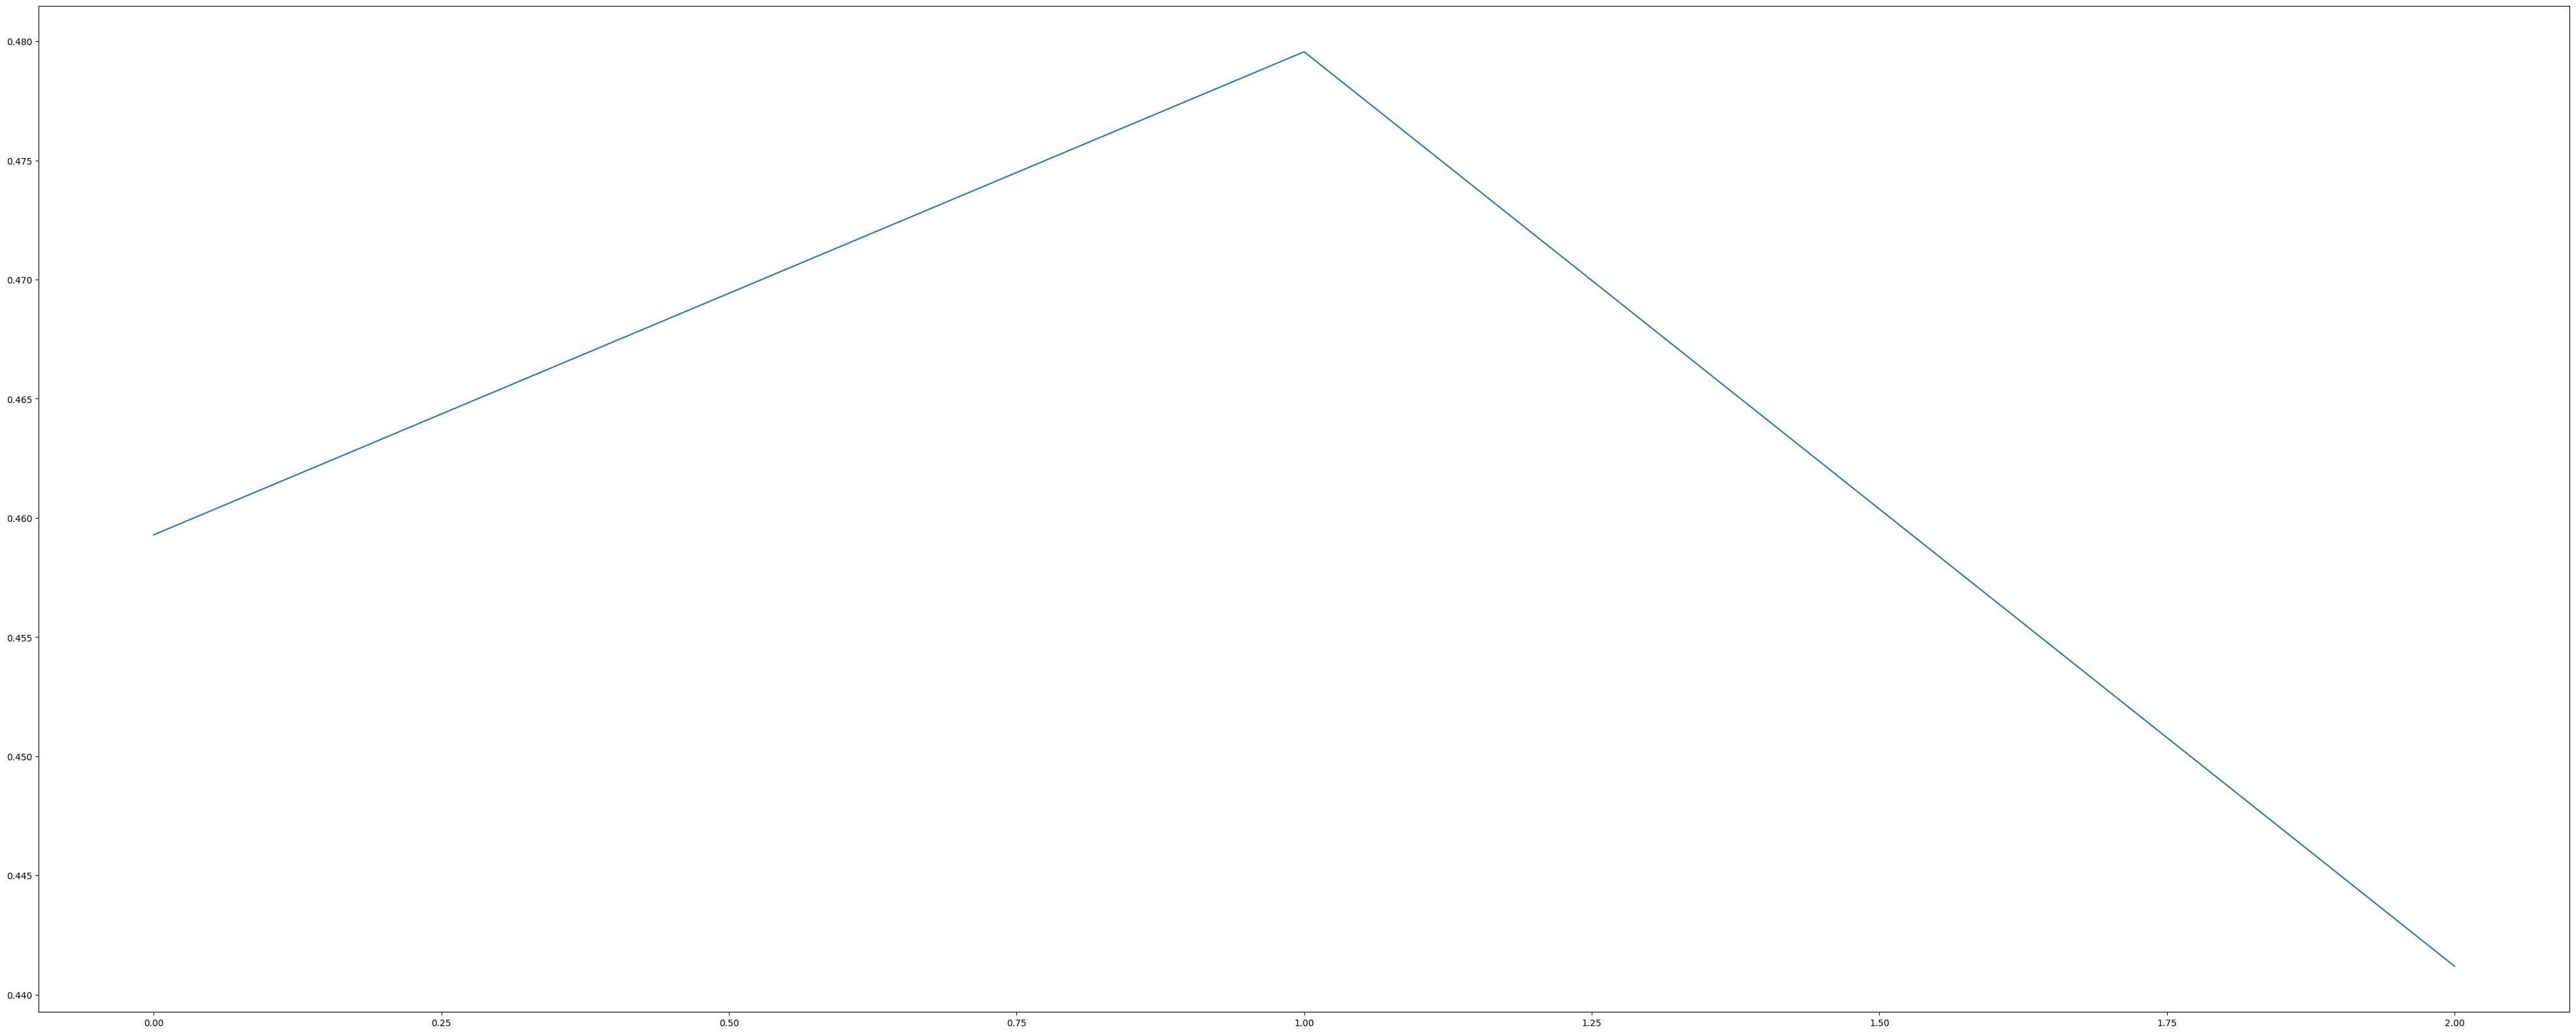

In [22]:
# MLPRegressor


from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Input data
X_train = train_data[:,1:]
X_validation = val_data[:,1:]
X_test = test_data[:,1:]

y_train = train_data[:,0]
y_validation = val_data[:,0]
y_test = test_data[:,0]

# Initialize MLP regressor

solvers = ['lbfgs', 'sgd', 'adam']

# Initialize lists to store MSE values for training and test sets
train_mse_values = []
Validation_mse_values = []

# Loop over each solver
for solver in solvers:
    # Create MLPRegressor model with current activation
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50, 50), activation=best_Activation_functions, solver=solver,
                         alpha=0.01, batch_size='auto', learning_rate='adaptive',
                         max_iter=1000, random_state=42)
    # Train the regressor
    mlp_regressor.fit(X_train, y_train)


    # Predict on training and validation sets

    y_train_pred = mlp_regressor.predict(X_train)
    y_test_pred = mlp_regressor.predict(X_validation)

    # Calculate MSE for training and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_validation, y_test_pred)

    # Append MSE values to lists
    train_mse_values.append(train_mse)
    Validation_mse_values.append(test_mse)

    print(f"SolverS: {solver}, Train MSE: {train_mse}, Validation MSE: {test_mse}")

# Find the solver that minimizes the test MSE
best_solver = solvers[np.argmin(Validation_mse_values)]
plt.figure(figsize=(50, 20))
plt.plot(Validation_mse_values)

print(f"Best best_solver: {best_solver }")


In [23]:

# MLPRegressor


from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Input data
X_train = train_data[:,1:]
X_validation = val_data[:,1:]
X_test = test_data[:,1:]

y_train = train_data[:,0]
y_validation = val_data[:,0]
y_test = test_data[:,0]

# Initialize MLP regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(50, 50, 50), activation=best_Activation_functions, solver=best_solver ,
                         alpha=0.0001, batch_size='auto', learning_rate='adaptive',
                         max_iter=1000, random_state=42)

# Train the regressor
mlp_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_train_MLPR = mlp_regressor.predict(X_train)
y_pred_test_MLPR = mlp_regressor.predict(X_test)

# Calculate Mean Squared Error
mse_train  = mean_squared_error(y_train,y_pred_train_MLPR)
mse_test = mean_squared_error(y_test, y_pred_test_MLPR)

print("Mean Squared Error for train :", mse_train ,"Mean Squared Errorfor test:", mse_test)

Mean Squared Error for train : 0.2690308707253237 Mean Squared Errorfor test: 0.4084641220617152


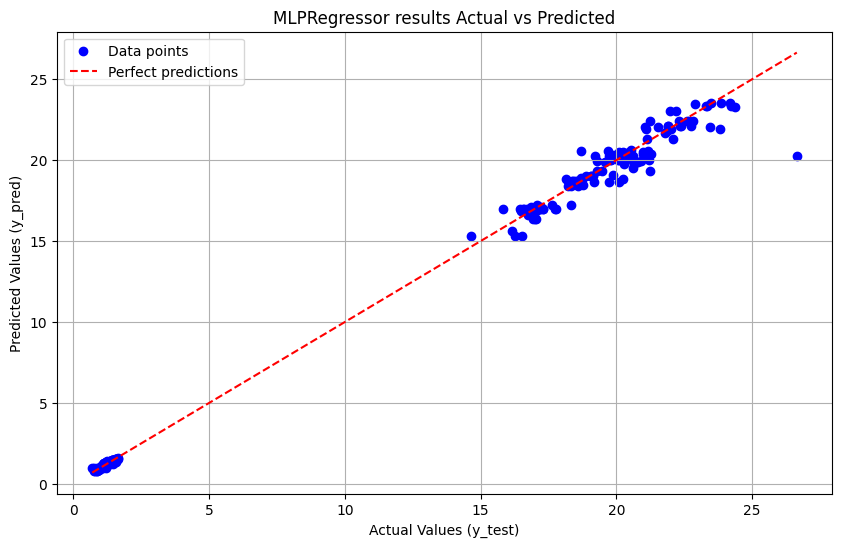

In [25]:
# Visualization of MLPRegressor results

import matplotlib.pyplot as plt
import numpy as np



# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test,  y_pred_test_MLPR, color='blue', label='Data points')
# Line indicating perfect predictions
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect predictions')



plt.title('MLPRegressor results Actual vs Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.grid(True)
plt.show()